In [ ]:
!pip install sqlalchemy pandas psycopg2-binary

In [ ]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import numpy as np

# Configuration de la connexion
username = 'mia17-hackaton'
password = 'hackaton-mia17'
host = 'postgresql-mia17-hackaton.alwaysdata.net'
port = 5432
database = 'mia17-hackaton_psql'

# URL de connexion
database_url = f'postgresql://{username}:{password}@{host}:{port}/{database}'

# Créer une engine de connexion
engine = create_engine(database_url)

# Connexion à la base de données
connection = engine.connect()

# Récupérer les noms des tables
inspector = inspect(engine)
tables = inspector.get_table_names()
print("Tables disponibles dans la base de données :", tables)

Tables disponibles dans la base de données : ['cleaned_olympic_data', 'cleaned_olympic_results', 'olympic_athletes', 'olympic_hosts', 'cleaned_olympic_results1', 'olympic_medals', 'olympic_results']


In [ ]:
df_cleaned_olympic_results = pd.read_sql_table('cleaned_olympic_results', engine)
df_cleaned_olympic_results.head()

,_id,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type,game_year
0,162113,Fencing,foil individual men,athens-1896,Athlete,BRONZE,None,True,3.0,Greece,GR,GRE,None,Periklis Pierrakos-Mavromikhalis,None,None,1896
1,162114,Fencing,foil individual men,athens-1896,Athlete,None,None,True,5.0,Greece,GR,GRE,https://olympics.com/en/athletes/konstantinos-...,Konstantinos KOMNINOS-MILIOTIS,None,None,1896
2,162115,Fencing,foil individual men,athens-1896,Athlete,None,None,True,5.0,France,FR,FRA,https://olympics.com/en/athletes/henri-de-laborde,Henri DE LABORDE,None,None,1896
3,162116,Fencing,foil individual men,athens-1896,Athlete,None,None,True,7.0,Greece,GR,GRE,https://olympics.com/en/athletes/ioannis-poulos,Ioannis POULOS,None,None,1896
4,162117,Fencing,foil individual men,athens-1896,Athlete,None,None,True,7.0,Greece,GR,GRE,None,Georgios Valakakis,None,None,1896


In [ ]:
df_cleaned_olympic_results = pd.read_sql_table('cleaned_olympic_data', engine)
df_cleaned_olympic_results

,country_name,game_year,BRONZE,GOLD,SILVER,total_medals,total_disciplines,total_events
0,Afghanistan,2008,1,0,0,1,1,2
1,Afghanistan,2012,1,0,0,1,3,4
2,Algeria,1984,2,0,0,2,4,12
3,Algeria,1992,1,1,0,2,8,29
4,Algeria,1996,1,2,0,3,9,27
...,...,...,...,...,...,...,...,...
1555,Zambia,1984,1,0,0,1,2,12
1556,Zambia,1996,0,0,1,1,2,5
1557,Zimbabwe,1980,0,1,0,1,10,20
1558,Zimbabwe,2004,1,1,1,3,4,8


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# import matplotlib.pyplot as plt

# # Séparer les caractéristiques et la cible
# X = df_cleaned_olympic_results[['game_year', 'total_disciplines', 'total_events', 'BRONZE', 'GOLD', 'SILVER']]
# y = df_cleaned_olympic_results['total_medals']

# # Diviser les données en ensembles d'entraînement et de test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardiser les caractéristiques
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Créer le modèle de régression
# model = Sequential()
# model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1))  # Une seule sortie pour la régression

# # Compiler le modèle
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# # Entraîner le modèle
# history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# # Évaluer le modèle
# loss, mae = model.evaluate(X_test, y_test)
# print(f"Mean Absolute Error: {mae}")

# # Prédire sur l'ensemble de test
# y_pred = model.predict(X_test)

# # Calculer les métriques de performance
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")
# print(f"Mean Absolute Error: {mae}")

# # Tracer les courbes de perte et de MAE
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.plot(history.history['mae'], label='Training MAE')
# plt.plot(history.history['val_mae'], label='Validation MAE')
# plt.title('Training and Validation Loss/MAE')
# plt.xlabel('Epoch')
# plt.ylabel('Loss/MAE')
# plt.legend()
# plt.show()


In [ ]:
df_olympic_medals = pd.read_sql_table('olympic_medals', engine)
df_olympic_medals.shape

(21697, 13)

In [ ]:
df_olympic_medals.isnull().sum()

_id                          0
discipline_title             0
slug_game                    0
event_title                  0
event_gender                 0
medal_type                   0
participant_type             0
participant_title        15113
athlete_url               4670
athlete_full_name         3624
country_name                 0
country_code              1502
country_3_letter_code        0
dtype: int64

In [ ]:
df_olympic_medals.duplicated().sum()
df_olympic_medals.columns

Index(['_id', 'discipline_title', 'slug_game', 'event_title', 'event_gender',
       'medal_type', 'participant_type', 'participant_title', 'athlete_url',
       'athlete_full_name', 'country_name', 'country_code',
       'country_3_letter_code'],
      dtype='object')

In [ ]:
df_olympic_medals = df_olympic_medals.rename({'slug_game':'game_slug'},axis=1)
df_olympic_medals.columns

Index(['_id', 'discipline_title', 'game_slug', 'event_title', 'event_gender',
       'medal_type', 'participant_type', 'participant_title', 'athlete_url',
       'athlete_full_name', 'country_name', 'country_code',
       'country_3_letter_code'],
      dtype='object')

In [ ]:
df_olympic_medals.loc[(df_olympic_medals.duplicated())]

,_id,discipline_title,game_slug,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code


In [ ]:
df_olympic_medals.participant_title.unique()

array(['Italy', 'Norway', 'Sweden', 'Great Britain', 'Japan', 'Canada',
       None, 'United States', 'China', 'ROC', 'Republic of Korea',
       "People's Republic of China", 'Hungary', 'Netherlands',
       'United States of America 1', 'Italy 1', 'Canada 1', 'Austria',
       'Slovenia', 'Germany', 'United States of America',
       'SUI Wenjing / HAN Cong', 'TARASOVA Evgenia / MOROZOV Vladimir',
       'MISHINA Anastasia / GALLIAMOV Aleksandr',
       'PAPADAKIS Gabriella / CIZERON Guillaume',
       'SINITSINA Victoria / KATSALAPOV Nikita',
       'HUBBELL Madison / DONOHUE Zachary', 'Latvia',
       'WENDL Tobias / ARLT Tobias', 'EGGERT Toni / BENECKEN Sascha',
       'STEU Thomas / KOLLER Lorenz', 'Finland', 'Slovakia', 'France',
       'Fiji', 'Spain', 'San Marino', "People's Republic of China 1",
       'ROC 2', 'ROC 1', 'Ukraine', 'Mexico', 'New Zealand', 'Cuba',
       'Australia', 'Czech Republic', 'Belarus', 'Poland', 'Brazil',
       'Denmark', 'Argentina', 'Hong Kong, Ch

In [ ]:
df_olympic_medals.drop(['participant_title', 'athlete_url'], axis=1, inplace=True)

In [ ]:
df_olympic_medals.tail()

,_id,discipline_title,game_slug,event_title,event_gender,medal_type,participant_type,athlete_full_name,country_name,country_code,country_3_letter_code
21692,21692,Weightlifting,athens-1896,heavyweight - one hand lift men,Men,SILVER,Athlete,Viggo JENSEN,Denmark,DK,DEN
21693,21693,Weightlifting,athens-1896,heavyweight - one hand lift men,Men,BRONZE,Athlete,Alexandros Nikolopoulos,Greece,GR,GRE
21694,21694,Weightlifting,athens-1896,heavyweight - two hand lift men,Men,GOLD,Athlete,Viggo JENSEN,Denmark,DK,DEN
21695,21695,Weightlifting,athens-1896,heavyweight - two hand lift men,Men,SILVER,Athlete,Launceston ELLIOT,Great Britain,GB,GBR
21696,21696,Weightlifting,athens-1896,heavyweight - two hand lift men,Men,BRONZE,Athlete,Sotirios VERSIS,Greece,GR,GRE


In [ ]:
df_olympic_results = pd.read_sql_table('olympic_results', engine)
df_olympic_results.head()

,_id,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,162113,Fencing,foil individual men,athens-1896,Athlete,BRONZE,None,True,3.0,Greece,GR,GRE,None,Periklis Pierrakos-Mavromikhalis,None,None
1,162114,Fencing,foil individual men,athens-1896,Athlete,None,None,True,5.0,Greece,GR,GRE,https://olympics.com/en/athletes/konstantinos-...,Konstantinos KOMNINOS-MILIOTIS,None,None
2,162115,Fencing,foil individual men,athens-1896,Athlete,None,None,True,5.0,France,FR,FRA,https://olympics.com/en/athletes/henri-de-laborde,Henri DE LABORDE,None,None
3,162116,Fencing,foil individual men,athens-1896,Athlete,None,None,True,7.0,Greece,GR,GRE,https://olympics.com/en/athletes/ioannis-poulos,Ioannis POULOS,None,None
4,162117,Fencing,foil individual men,athens-1896,Athlete,None,None,True,7.0,Greece,GR,GRE,None,Georgios Valakakis,None,None


In [ ]:
df_olympic_results.shape

(162804, 16)

In [ ]:
df_olympic_results.isnull().sum()

_id                           0
discipline_title              0
event_title                   0
slug_game                     0
participant_type              0
medal_type               142598
athletes                 154828
rank_equal               130279
rank_position             18083
country_name                  0
country_code               5053
country_3_letter_code         2
athlete_url               32783
athlete_full_name         21138
value_unit                84155
value_type                72765
dtype: int64

In [ ]:
df_olympic_results.duplicated().sum()

0

In [ ]:
df_olympic_results.drop(['athlete_url'], axis=1, inplace=True)
df_olympic_results = df_olympic_results.rename({'slug_game':'game_slug'},axis=1)
df_olympic_results.columns

Index(['_id', 'discipline_title', 'event_title', 'game_slug',
       'participant_type', 'medal_type', 'athletes', 'rank_equal',
       'rank_position', 'country_name', 'country_code',
       'country_3_letter_code', 'athlete_full_name', 'value_unit',
       'value_type'],
      dtype='object')

In [ ]:
df_olympic_athletes = pd.read_sql_table('olympic_athletes', engine)
df_olympic_athletes.head()

,_id,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,24603,https://olympics.com/en/athletes/petit-jesus-n...,Petit Jesus NGNITEDEM,1,Athens 2004,None,None,None
1,24604,https://olympics.com/en/athletes/hamid-ait-big...,Hamid AIT BIGHRADE,1,Athens 2004,None,None,None
2,24605,https://olympics.com/en/athletes/abner-mares-m...,Abner MARES MARTINEZ,1,Athens 2004,None,None,None
3,24606,https://olympics.com/en/athletes/argenis-mendez,Argenis MENDEZ,1,Athens 2004,None,None,None
4,24607,https://olympics.com/en/athletes/joel-brunker,Joel BRUNKER,1,Athens 2004,None,None,None


In [ ]:
df_olympic_athletes.shape

(75904, 8)

In [ ]:
df_olympic_athletes.isnull().sum()

_id                         0
athlete_url                 0
athlete_full_name           0
games_participations        0
first_game                 22
athlete_year_birth      75904
athlete_medals          60552
bio                     53062
dtype: int64

In [ ]:
df_olympic_hosts = pd.read_sql_table('olympic_hosts', engine)
df_olympic_hosts.head()

,_id,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,0,beijing-2022,2022-02-20 13:00:00,2022-02-04 16:00:00,China,Beijing 2022,Winter,2022
1,1,tokyo-2020,2021-08-08 16:00:00,2021-07-23 13:00:00,Japan,Tokyo 2020,Summer,2020
2,2,pyeongchang-2018,2018-02-25 09:00:00,2018-02-09 00:00:00,Republic of Korea,PyeongChang 2018,Winter,2018
3,3,rio-2016,2016-08-21 23:00:00,2016-08-05 14:00:00,Brazil,Rio 2016,Summer,2016
4,4,sochi-2014,2014-02-23 17:00:00,2014-02-07 05:00:00,Russian Federation,Sochi 2014,Winter,2014


In [ ]:
df_olympic_hosts.shape

(53, 8)

In [ ]:
df_olympic_hosts.columns

Index(['_id', 'game_slug', 'game_end_date', 'game_start_date', 'game_location',
       'game_name', 'game_season', 'game_year'],
      dtype='object')

In [ ]:
df_olympic_hosts.drop(['_id'], axis=1, inplace=True)
df_olympic_hosts.columns

Index(['game_slug', 'game_end_date', 'game_start_date', 'game_location',
       'game_name', 'game_season', 'game_year'],
      dtype='object')

In [ ]:
df_olympic_hosts.isnull().sum()

game_slug          0
game_end_date      0
game_start_date    0
game_location      0
game_name          0
game_season        0
game_year          0
dtype: int64

In [ ]:
# Remplacement des valeurs manquantes
df_olympic_medals.fillna(0, inplace=True)
df_olympic_results.fillna(0, inplace=True)
df_olympic_athletes.fillna(0, inplace=True)
df_olympic_hosts.fillna(0, inplace=True)

In [ ]:
# Conversion des dates en format numérique
df_olympic_hosts['game_end_date'] = pd.to_datetime(df_olympic_hosts['game_end_date']).astype(int) / 10**9
df_olympic_hosts['game_start_date'] = pd.to_datetime(df_olympic_hosts['game_start_date']).astype(int) / 10**9

In [ ]:
jo_types = df_olympic_hosts[['game_slug','game_season', 'game_year']]
print(jo_types)

                      game_slug game_season  game_year
0                  beijing-2022      Winter       2022
1                    tokyo-2020      Summer       2020
2              pyeongchang-2018      Winter       2018
3                      rio-2016      Summer       2016
4                    sochi-2014      Winter       2014
5                   london-2012      Summer       2012
6                vancouver-2010      Winter       2010
7                  beijing-2008      Summer       2008
8                    turin-2006      Winter       2006
9                   athens-2004      Summer       2004
10          salt-lake-city-2002      Winter       2002
11                  sydney-2000      Summer       2000
12                  nagano-1998      Winter       1998
13                 atlanta-1996      Summer       1996
14             lillehammer-1994      Winter       1994
15               barcelona-1992      Summer       1992
16             albertville-1992      Winter       1992
17        

In [ ]:
hosts_results_merge = df_olympic_results.merge(jo_types, on='game_slug')
hosts_results_merge.drop(['_id', 'value_unit', 'value_type'], axis=1, inplace=True)

hosts_results_merge.head()

,discipline_title,event_title,game_slug,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_full_name,game_season,game_year
0,Fencing,foil individual men,athens-1896,Athlete,BRONZE,0,True,3.0,Greece,GR,GRE,Periklis Pierrakos-Mavromikhalis,Summer,1896
1,Fencing,foil individual men,athens-1896,Athlete,0,0,True,5.0,Greece,GR,GRE,Konstantinos KOMNINOS-MILIOTIS,Summer,1896
2,Fencing,foil individual men,athens-1896,Athlete,0,0,True,5.0,France,FR,FRA,Henri DE LABORDE,Summer,1896
3,Fencing,foil individual men,athens-1896,Athlete,0,0,True,7.0,Greece,GR,GRE,Ioannis POULOS,Summer,1896
4,Fencing,foil individual men,athens-1896,Athlete,0,0,True,7.0,Greece,GR,GRE,Georgios Valakakis,Summer,1896


In [ ]:
hosts_results_merge.shape

(162804, 14)

In [ ]:
# Création de colonnes pour chaque type de médaille
hosts_results_merge['medal_type_BRONZE'] = hosts_results_merge['medal_type'].apply(lambda x: 1 if x == 'BRONZE' else 0)
hosts_results_merge['medal_type_SILVER'] = hosts_results_merge['medal_type'].apply(lambda x: 1 if x == 'SILVER' else 0)
hosts_results_merge['medal_type_GOLD'] = hosts_results_merge['medal_type'].apply(lambda x: 1 if x == 'GOLD' else 0)

# Agréger les données par pays et année des Jeux
country_year_agg = hosts_results_merge.groupby(['country_name', 'game_year']).agg({
    'medal_type_BRONZE': 'sum',
    'medal_type_SILVER': 'sum',
    'medal_type_GOLD': 'sum'
}).reset_index()

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Epoch 1/50
231/231 [==============================] - 6s 9ms/step - loss: nan - accuracy: 0.2254 - val_loss: nan - val_accuracy: 0.1892
Epoch 2/50
231/231 [==============================] - 2s 7ms/step - loss: nan - accuracy: 0.2275 - val_loss: nan - val_accuracy: 0.1892
Epoch 3/50
231/231 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.2275 - val_loss: nan - val_accuracy: 0.1892
Epoch 4/50
231/231 [==============================] - 2s 7ms/step - loss: nan - accuracy: 0.2275 - val_loss: nan - val_accuracy: 0.1892
Epoch 5/50
231/231 [==============================] - 2s 7ms/step - loss: nan - accuracy: 0.2275 - val_loss: nan - val_accuracy: 0.1892
Epoch 6/50
231/231 [==============================] - 2s 9ms/step - loss: nan - accuracy: 0.2275 - val_loss: nan - val_accuracy: 0.1892
Epoch 7/50
231/231 [==============================] - 2s 10ms/step - loss: nan - accuracy: 0.2275 - val_loss: nan - val_accuracy: 0.1892
Epoch 8/50
231/231 [===========================

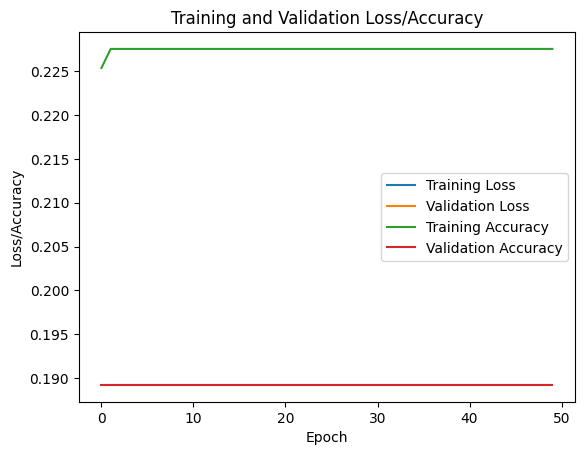

In [ ]:
# Ajouter une colonne pour le nombre total de médailles
country_year_agg['total_medals'] = country_year_agg['medal_type_BRONZE'] + country_year_agg['medal_type_SILVER'] + country_year_agg['medal_type_GOLD']

# Créer des catégories pour le nombre de médailles
bins = [0, 5, 10, 20, 50, 100, np.inf]
labels = ['0-5', '6-10', '11-20', '21-50', '51-100', '100+']
country_year_agg['medal_category'] = pd.cut(country_year_agg['total_medals'], bins=bins, labels=labels)

# Encoder les catégories
label_encoder = LabelEncoder()
country_year_agg['medal_category_encoded'] = label_encoder.fit_transform(country_year_agg['medal_category'])

# Préparation des données pour le modèle
X = country_year_agg[['game_year']]  # Features (ajouter plus de caractéristiques si nécessaire)
y = country_year_agg['medal_category_encoded']  # Cible

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardiser les caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Créer le modèle
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(labels), activation='softmax'))

# Compiler le modèle
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Évaluer le modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Prédire sur les données de test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Rapport de classification
#print(classification_report(y_test, y_pred_classes, target_names=labels))

# Tracer les courbes de perte et de précision
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Loss/Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [ ]:
# merged_medals_results = pd.merge(df_olympic_medals, df_olympic_results,
#                                  on=['discipline_title', 'slug_game', 'event_title', 'event_gender',
#                                      'medal_type', 'participant_type', 'athlete_url',
#                                      'athlete_full_name', 'country_name', 'country_code', 'country_3_letter_code'],
#                                  how='outer')
# print(merged_medals_results.head())


# common_columns = ['discipline_title', 'slug_game', 'event_title',
#                   'medal_type', 'participant_type',  'athlete_url',
#                   'athlete_full_name', 'country_name', 'country_code', 'country_3_letter_code']

# # Vérification que les colonnes existent dans les deux DataFrames
# for col in common_columns:
#     if col not in df_olympic_medals.columns or col not in df_olympic_results.columns:
#         raise ValueError(f"La colonne '{col}' est absente dans l'un des DataFrames.")

# merged_medals_results = pd.merge(df_olympic_medals, df_olympic_results,
#                                  on=common_columns,
#                                  how='outer')
# print(merged_medals_results.head())

# common_columns = ['discipline_title', 'slug_game', 'event_title',
#                   'medal_type', 'participant_type', 'athlete_url',
#                   'athlete_full_name', 'country_name', 'country_code', 'country_3_letter_code']

# # Vérification que les colonnes existent dans les deux DataFrames
# for col in common_columns:
#     if col not in df_olympic_medals.columns or col not in df_olympic_results.columns:
#         raise ValueError(f"La colonne '{col}' est absente dans l'un des DataFrames.")

# merged_medals_results = pd.merge(df_olympic_medals, df_olympic_results,
#                                  on=common_columns,
#                                  how='outer')
# print(merged_medals_results.head())




In [ ]:
hosts_results_merge.game_season.unique()

In [ ]:
summer_games_results = hosts_results_merge.loc[(hosts_results_merge.game_season == 'Summer')].copy()
winter_games_results = hosts_results_merge.loc[(hosts_results_merge.game_season == 'Winter')].copy()

In [ ]:
summer_games_results.drop(['game_season'], axis=1, inplace=True)
summer_games_results.head()

In [ ]:
summer_games_results.shape

In [ ]:
summer_games_results.isnull().sum()

In [ ]:
summer_games_results.duplicated().sum()

In [ ]:
dopplers = summer_games_results.loc[(summer_games_results.duplicated())]
dopplers

In [ ]:
summer_games_results.medal_type.unique()

In [ ]:
summer_games_results['medal_type'] = summer_games_results['medal_type'].fillna('None')

In [ ]:
summer_games_results['total_medals'] = summer_games_results['medal_type'].apply(lambda x: 0 if x == 'None' else 1)
summer_games_results['gold_medals'] = summer_games_results['medal_type'].apply(lambda x: 1 if x == 'GOLD' else 0)
summer_games_results['silver_medals'] = summer_games_results['medal_type'].apply(lambda x: 1 if x == 'SILVER' else 0)
summer_games_results['bronze_medals'] = summer_games_results['medal_type'].apply(lambda x: 1 if x == 'BRONZE' else 0)

In [ ]:
summer_games_results

In [ ]:
summer_games_results.country_name.unique()

In [ ]:
historic_medalsbycountry = summer_games_results.groupby(['game_year','country_name']).agg({'total_medals':'sum', 'gold_medals':'sum', 'silver_medals':'sum','bronze_medals':'sum'})

In [ ]:
historic_medalsbycountry = historic_medalsbycountry.sort_values(by=['game_year','total_medals'],ascending=[True, False]).reset_index()

In [ ]:
historic_medalsbycountry

In [ ]:
historic_sportsbycountry = summer_games_results.groupby(['game_year','country_name','discipline_title']).count()
historic_sportsbycountry

In [ ]:
historic_sportsbycountry = historic_sportsbycountry[['event_title']].reset_index()
historic_sportsbycountry = historic_sportsbycountry.rename({'discipline_title':'sports', 'event_title':'epreuves'},axis=1)
historic_sportsbycountry

In [ ]:
historic_sportsbycountry = historic_sportsbycountry.groupby(['game_year','country_name']).agg({'sports':'count'})

In [ ]:
historic_sportsbycountry = historic_sportsbycountry.reset_index()
historic_sportsbycountry

In [ ]:
historic_epreuvesbycountry = summer_games_results.groupby(['game_year','country_name','event_title']).count()
historic_epreuvesbycountry

In [ ]:
# athlete_columns = ['athlete_url', 'athlete_full_name']

# # Vérification que les colonnes existent dans les DataFrames concernés
# for col in athlete_columns:
#     if col not in merged_medals_results.columns or col not in df_olympic_athletes.columns:
#         raise ValueError(f"La colonne '{col}' est absente dans l'un des DataFrames.")

# merged_medals_results_athletes = pd.merge(merged_medals_results, df_olympic_athletes,
#                                           on=athlete_columns,
#                                           how='left')
# print(merged_medals_results_athletes.head())


In [ ]:
# df_olympic_hosts = df_olympic_hosts.rename(columns={'game_slug': 'slug_game'})
# # Vérification et affichage des colonnes avant la fusion
# print("Colonnes avant fusion avec 'olympic_hosts':")
# print("Colonnes de merged_medals_results_athletes:", merged_medals_results_athletes.columns.tolist())
# print("Colonnes de olympic_hosts:", df_olympic_hosts.columns.tolist())

# df_olympic_hosts = df_olympic_hosts.rename(columns={'game_slug': 'slug_game'})


# print(merged_medals_results_athletes['slug_game'].dtype)
# print(df_olympic_hosts['slug_game'].dtype)


# print(merged_medals_results_athletes['slug_game'].unique())
# print(df_olympic_hosts['slug_game'].unique())

# merged_medals_results_athletes.columns = [col.lower() for col in merged_medals_results_athletes.columns]
# olympic_hosts.columns = [col.lower() for col in olympic_hosts.columns]

# print("Colonnes de merged_medals_results_athletes:", merged_medals_results_athletes.columns.tolist())
# print("Colonnes de olympic_hosts:", olympic_hosts.columns.tolist())

# # Vérification que les colonnes existent dans les DataFrames concernés
# if 'slug_game' not in merged_medals_results_athletes.columns or 'slug_game' not in df_olympic_hosts.columns:
#     raise ValueError("La colonne 'slug_game' est absente dans l'un des DataFrames.")

# # Fusionner en évitant les colonnes dupliquées
# final_df = pd.merge(merged_medals_results_athletes, df_olympic_hosts,
#                     on='slug_game',
#                     how='left',
#                     suffixes=('_athlete', '_host'))

# print(final_df.head())

In [ ]:
# print(final_df.columns)

In [ ]:
# # Remplir les valeurs manquantes avec une valeur appropriée
# final_df = final_df.fillna(0)

# # Supprimer les colonnes inutiles
# columns_to_drop = ['_id_x', '_id_y', '_id_athlete', '_id_host',
#                    'athlete_url', 'athlete_full_name', 'bio',
#                    'value_unit', 'value_type', 'rank_equal', 'rank_position']
# final_df = final_df.drop(columns=columns_to_drop)
# print(final_df.columns)


In [ ]:
# categorical_columns = ['discipline_title', 'slug_game', 'event_title', 'event_gender',
#                        'medal_type', 'participant_type', 'participant_title',
#                        'country_name', 'country_code', 'country_3_letter_code',
#                        'game_location', 'game_name', 'game_season']

# final_df = pd.get_dummies(final_df, columns=categorical_columns)

# print(final_df.columns)


In [ ]:
# from sklearn.preprocessing import StandardScaler

# numeric_columns = ['games_participations', 'athlete_year_birth', 'athlete_medals',
#                    'game_end_date', 'game_start_date', 'game_year']

# scaler = StandardScaler()
# final_df[numeric_columns] = scaler.fit_transform(final_df[numeric_columns])


In [ ]:
# # Agréger les données par pays
# country_df = final_df.groupby('country_name').agg({
#     'games_participations': 'sum',
#     'athlete_medals': 'sum',
#     'game_year': 'mean',  # Moyenne des années des Jeux
#     # Ajouter d'autres agrégations nécessaires
# }).reset_index()

# print(country_df)
